In [121]:
import os 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import GridSearchCV
import seaborn as sns

In [2]:
!pip install xgboost

In [2]:
os.chdir('D:\\ds\\dd')

In [3]:
os.listdir()

['bank.xlsx',
 'bankloan (2).sas7bdat',
 'dataframe',
 'dataframe.csv',
 'eigen_value.csv',
 'Fish_dataset.csv',
 'heart_failure_clinical_records_dataset.csv',
 'HR_comma_sep.csv',
 'Linear Regression using Python_Class Assessment.pdf',
 'loading_telco',
 'loading_telco.csv',
 'Mobile_data.csv',
 'pd_data',
 'pd_data.csv',
 'purchase_predictions',
 'purchase_predictions.csv',
 'sample_submission.csv',
 'TaxiFare.csv',
 'telco_csv.csv',
 'test.csv',
 'test_profile.csv',
 'train.csv',
 'train_profile.csv',
 'Treebased_algo.ipynb',
 'Variance.csv',
 'week 1',
 'week 1.csv',
 'xAPI-Edu-Data.csv']

In [4]:
x1=pd.read_csv('train.csv')
x2=pd.read_csv('test.csv')

In [5]:
x1.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [6]:
#eda 

In [7]:
#univariate

In [8]:
x1["Product_ID"].value_counts(dropna=False)

P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00206542       1
P00353742       1
P00057842       1
P00126342       1
P00353042       1
Name: Product_ID, Length: 3631, dtype: int64

In [9]:
x1["Gender"].value_counts(dropna=False)

M    414259
F    135809
Name: Gender, dtype: int64

In [10]:
x2["Gender"].value_counts(dropna=False)

M    175772
F     57827
Name: Gender, dtype: int64

In [11]:
gender_d={"M" : 1,"F" : 0}
x1=x1.replace({"Gender" : gender_d})

In [12]:
gender_d={"M" : 1,"F" : 0}
x2=x2.replace({"Gender" : gender_d})

In [13]:
x1["Age"].value_counts(dropna=False)

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

In [14]:
x2["Age"].value_counts(dropna=False)

26-35    93428
36-45    46711
18-25    42293
46-50    19577
51-55    16283
55+       9075
0-17      6232
Name: Age, dtype: int64

In [15]:
age_d={"0-17":1,
      "18-25":2,
      "26-35":3,
      "36-45":4,
      "46-50":5,
      "51-55":6,
      "55+":7}
x1=x1.replace({"Age" : age_d})

In [16]:
age_d={"0-17":1,
      "18-25":2,
      "26-35":3,
      "36-45":4,
      "46-50":5,
      "51-55":6,
      "55+":7}
x2=x2.replace({"Age" : age_d})

In [17]:
x1

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,1,6,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,0,3,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,0,3,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,0,7,1,C,2,0,20,NaN,NaN,365


In [18]:
x2

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,1,5,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,1,3,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,0,4,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,0,4,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,0,3,1,C,1,0,4,5.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,0,3,15,B,4+,1,8,NaN,NaN
233595,1006036,P00254642,0,3,15,B,4+,1,5,8.0,NaN
233596,1006036,P00031842,0,3,15,B,4+,1,1,5.0,12.0
233597,1006037,P00124742,0,5,1,C,4+,0,10,16.0,NaN


In [19]:
x1["City_Category"].value_counts(dropna=False)

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

In [20]:
x2["City_Category"].value_counts(dropna=False)

B    98566
C    72509
A    62524
Name: City_Category, dtype: int64

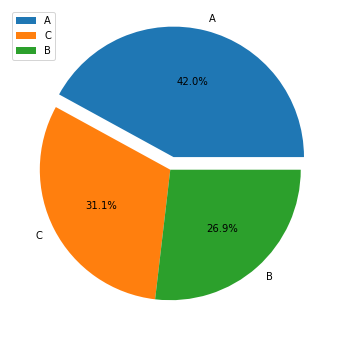

In [21]:
explode = (0.1, 0, 0)
fig1, ax1 = plt.subplots(figsize=(11,6))
ax1.pie(x1['City_Category'].value_counts(), explode=explode, labels=x1['City_Category'].unique(), autopct='%1.1f%%')
plt.legend()
plt.show()

In [22]:
# from this we can conclude that from every city category people shopped really well during this sale 
# also we can say maybe this store was easily accessible to them thats why they shopped a lot from the store during black friday sale

In [23]:
City_Category_dict={"A":1,
                      "B":2,
                       "C":3}
x1=x1.replace({"City_Category": City_Category_dict})

In [24]:
City_Category_dict={"A":1,
                      "B":2,
                       "C":3}
x2=x2.replace({"City_Category": City_Category_dict})

In [25]:
x1["Stay_In_Current_City_Years"].value_counts(dropna=False)

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64

In [26]:
x2["Stay_In_Current_City_Years"].value_counts(dropna=False)

1     82604
2     43589
3     40143
4+    35945
0     31318
Name: Stay_In_Current_City_Years, dtype: int64

In [27]:
stay_d={"0":0,
       "1":1,
       "2":2,
       "3":3,
       "4+":4}
x1=x1.replace({"Stay_In_Current_City_Years":stay_d})

In [28]:
stay_d={"0":0,
       "1":1,
       "2":2,
       "3":3,
       "4+":4}
x2=x2.replace({"Stay_In_Current_City_Years":stay_d})

In [29]:
x1["Marital_Status"].value_counts(dropna=False)

0    324731
1    225337
Name: Marital_Status, dtype: int64

In [30]:
x2["Marital_Status"].value_counts(dropna=False)

0    137807
1     95792
Name: Marital_Status, dtype: int64

In [31]:
x1["Occupation"].value_counts(dropna=False)

4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64

In [32]:
def unique(column):
    x = np.array(column)
    print(np.unique(x))

In [33]:
print("The unique ID numbers of customers occupations:")
unique(x1['Occupation'])

The unique ID numbers of customers occupations:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


In [34]:
# now we will see how much total money is spent by each category of occupations

In [35]:
occupations_id = list(range(0, 21))
spent_money = []
for oid in occupations_id:
    spent_money.append(x1[x1['Occupation'] == oid]['Purchase'].sum())

spent_money

[635406958,
 424614144,
 238028583,
 162002168,
 666244484,
 113649759,
 188416784,
 557371587,
 14737388,
 54340046,
 115844465,
 106751618,
 305449446,
 71919481,
 259454692,
 118960211,
 238346955,
 393281453,
 60721461,
 73700617,
 296570442]

In [36]:
# we will see this through bar graph


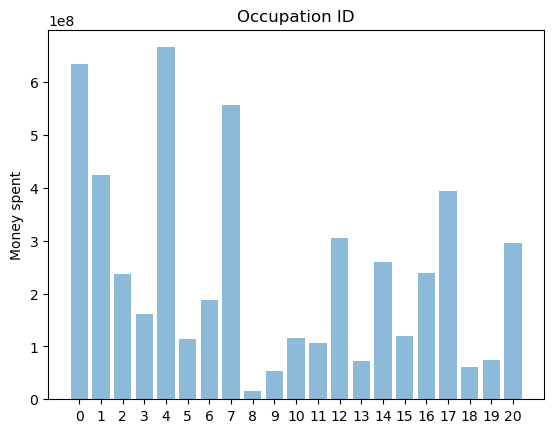

In [37]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt

objects = ('0', '1', '2', '3', '4', '5','6','7','8','9','10', '11','12', '13', '14', '15', '16', '17', '18', '19', '20')
y_pos = np.arange(len(objects))

plt.bar(y_pos, spent_money, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Money spent')
plt.title('Occupation ID')

plt.show()


In [38]:
# category 0&1 spent a lot of money on this sale maybe they are the richest ones
# also, category 8 spent very least amount of money ;maybe that was the poorest category of occupation or those people may be least interetsed

In [39]:
x1["Product_Category_1"].describe()

count    550068.000000
mean          5.404270
std           3.936211
min           1.000000
25%           1.000000
50%           5.000000
75%           8.000000
max          20.000000
Name: Product_Category_1, dtype: float64

In [40]:
x1["Product_Category_1"].head()

0     3
1     1
2    12
3    12
4     8
Name: Product_Category_1, dtype: int64

In [41]:
x1["Product_Category_2"].value_counts(dropna=False)

NaN     173638
8.0      64088
14.0     55108
2.0      49217
16.0     43255
15.0     37855
5.0      26235
4.0      25677
6.0      16466
11.0     14134
17.0     13320
13.0     10531
9.0       5693
12.0      5528
10.0      3043
3.0       2884
18.0      2770
7.0        626
Name: Product_Category_2, dtype: int64

In [42]:
x2["Product_Category_2"].value_counts(dropna=False)

NaN     72344
8.0     27229
14.0    23726
2.0     21281
16.0    18432
15.0    16259
4.0     11028
5.0     10930
6.0      7109
11.0     6096
17.0     5784
13.0     4523
9.0      2484
12.0     2273
10.0     1377
18.0     1257
3.0      1239
7.0       228
Name: Product_Category_2, dtype: int64

In [43]:
x2["Product_Category_2"].fillna(0,inplace=True)

In [44]:
x1["Product_Category_2"].fillna(0,inplace=True)

In [45]:
x1["Product_Category_2"].isnull().sum()

0

In [46]:
x1["Product_Category_3"].value_counts(dropna=False)

NaN     383247
16.0     32636
15.0     28013
14.0     18428
17.0     16702
5.0      16658
8.0      12562
9.0      11579
12.0      9246
13.0      5459
6.0       4890
18.0      4629
4.0       1875
11.0      1805
10.0      1726
3.0        613
Name: Product_Category_3, dtype: int64

In [47]:
x1["Product_Category_3"].fillna(0,inplace=True)

In [48]:
x2["Product_Category_3"].fillna(0,inplace=True)

In [49]:
x1["Product_Category_3"].isnull().sum()

0

In [50]:
x1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  int64  
 3   Age                         550068 non-null  int64  
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  int64  
 6   Stay_In_Current_City_Years  550068 non-null  int64  
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          550068 non-null  float64
 10  Product_Category_3          550068 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(9), object(1)
memory usage: 50.4+ MB


## bivariate

In [52]:
prod_purchase=x1.groupby(["Product_ID"]).Purchase.agg("mean").to_frame("Mean_purchase_value").reset_index()


In [53]:
prod_purchase.sort_values("Mean_purchase_value",ascending=False)

,Product_ID,Mean_purchase_value
836,P00086242,21256.505495
827,P00085342,20980.268116
1902,P00200642,20468.773234
1070,P00116142,20463.791277
1102,P00119342,20448.756494
...,...,...
3567,P00372445,374.930705
3568,P00375436,374.266585
3566,P00371644,362.911012
3565,P00370853,37.393643


In [54]:
# therefore we can conclude from this that many products are associated with these product id's 

In [55]:
count_purchase=x1.groupby(["Product_ID"]).Purchase.agg("count").to_frame("category_count").reset_index()
count_purchase.sort_values("category_count",ascending=True)

,Product_ID,category_count
2942,P00306942,1
2968,P00309642,1
2962,P00309042,1
3340,P00348142,1
2953,P00308042,1
...,...,...
565,P00057642,1470
1030,P00112142,1562
1016,P00110742,1612
249,P00025442,1615


In [56]:
count_purchase=x1.groupby(["Product_ID"]).Purchase.agg("count").to_frame("count_of_products").reset_index()
count_purchase.sort_values("count_of_products",ascending=False)

,Product_ID,count_of_products
2536,P00265242,1880
249,P00025442,1615
1016,P00110742,1612
1030,P00112142,1562
565,P00057642,1470
...,...,...
669,P00068742,1
120,P00012342,1
1530,P00162742,1
891,P00091742,1


In [57]:
unique=pd.DataFrame(x1.Product_ID.unique(),columns=["Product_ID"])
unique

,Product_ID
0,P00069042
1,P00248942
2,P00087842
3,P00085442
4,P00285442
...,...
3626,P00375436
3627,P00372445
3628,P00370293
3629,P00371644


In [58]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
count_purchase["product_popularity_score"]=scaler.fit_transform(count_purchase[["count_of_products"]])

In [59]:
count_purchase

,Product_ID,count_of_products,product_popularity_score
0,P00000142,1152,0.612560
1,P00000242,376,0.199574
2,P00000342,244,0.129324
3,P00000442,92,0.048430
4,P00000542,149,0.078765
...,...,...,...
3626,P0099442,200,0.105907
3627,P0099642,13,0.006386
3628,P0099742,126,0.066525
3629,P0099842,102,0.053752


In [60]:
product_scores=pd.merge(unique,count_purchase)

In [61]:
product_scores.drop(columns=['count_of_products'],inplace=True)



In [62]:
product_scores

,Product_ID,product_popularity_score
0,P00069042,0.120277
1,P00248942,0.308675
2,P00087842,0.053752
3,P00085442,0.180947
4,P00285442,0.107504
...,...,...
3626,P00375436,0.432677
3627,P00372445,0.444918
3628,P00370293,0.417243
3629,P00371644,0.477914


In [63]:
# adding this to train and test dataset

In [64]:
product_dict= dict(zip(product_scores.Product_ID,product_scores.product_popularity_score))
x1["product_popularity_score"]=x1["Product_ID"].map(product_dict)
x2["product_popularity_score"]=x2["Product_ID"].map(product_dict)

In [65]:
x1

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,product_popularity_score
0,1000001,P00069042,0,1,10,1,2,0,3,0.0,0.0,8370,0.120277
1,1000001,P00248942,0,1,10,1,2,0,1,6.0,14.0,15200,0.308675
2,1000001,P00087842,0,1,10,1,2,0,12,0.0,0.0,1422,0.053752
3,1000001,P00085442,0,1,10,1,2,0,12,14.0,0.0,1057,0.180947
4,1000002,P00285442,1,7,16,3,4,0,8,0.0,0.0,7969,0.107504
...,...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,1,6,13,2,1,1,20,0.0,0.0,368,0.444918
550064,1006035,P00375436,0,3,1,3,3,0,20,0.0,0.0,371,0.432677
550065,1006036,P00375436,0,3,15,2,4,1,20,0.0,0.0,137,0.432677
550066,1006038,P00375436,0,7,1,3,2,0,20,0.0,0.0,365,0.432677


In [66]:
df1=x2.drop(columns=["User_ID","Product_ID"])     # test_data
df=x1.drop(columns=["User_ID","Product_ID"])

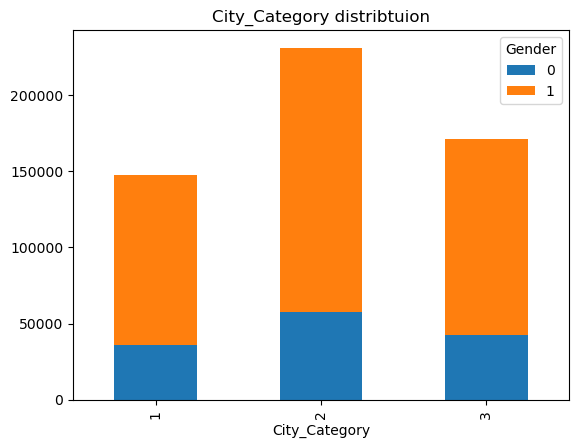

In [67]:
pd.crosstab(df['City_Category'], df['Gender']).plot(kind='bar', stacked=True);
plt.title('City_Category distribtuion')
plt.show()

In [68]:

# there are more no of males in every city compared to females

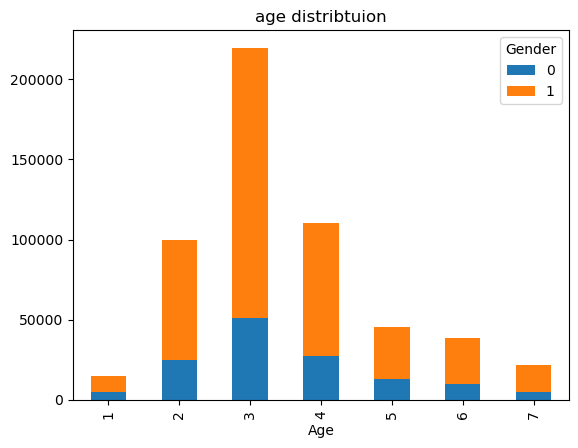

In [69]:
pd.crosstab(df['Age'], df['Gender']).plot(kind='bar', stacked=True);
plt.title('age distribtuion')
plt.show()

In [70]:
#more no of males are there between  26-35 years of age
#0-17,55+ category- very less males & females


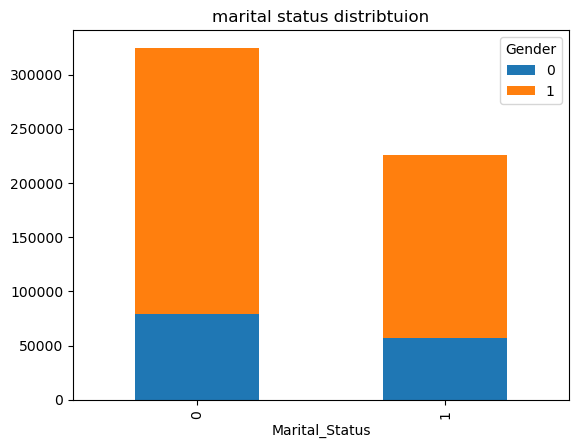

In [71]:
pd.crosstab(df['Marital_Status'], df['Gender']).plot(kind='bar', stacked=True);
plt.title('marital status distribtuion')
plt.show()

In [72]:
# most of the males are unmarried than females 


In [73]:
# checking for outliers 

In [74]:
df.describe(percentiles=[0.01,0.02,0.03,0.04,0.05,0.1,.25,.75,.9, .95, .96, .97, .98, .99]).T

,count,mean,std,min,1%,2%,3%,4%,5%,10%,25%,50%,75%,90%,95%,96%,97%,98%,99%,max
Gender,550068.0,0.753105,0.431205,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
Age,550068.0,3.496430,1.353632,1.0,1.000000,1.000000,2.00000,2.000000,2.000000,2.000000,3.00000,3.000000,4.000000,6.000000,6.000000,6.000000,7.000000,7.000000,7.000000,7.0
Occupation,550068.0,8.076707,6.522660,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,2.00000,7.000000,14.000000,17.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.0
City_Category,550068.0,2.042640,0.760211,1.0,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.00000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.0
Stay_In_Current_City_Years,550068.0,1.858418,1.289443,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.00000,2.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.0
Marital_Status,550068.0,0.409653,0.491770,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
Product_Category_1,550068.0,5.404270,3.936211,1.0,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.00000,5.000000,8.000000,11.000000,13.000000,15.000000,16.000000,16.000000,18.000000,20.0
Product_Category_2,550068.0,6.735436,6.215492,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,5.000000,14.000000,16.000000,16.000000,16.000000,16.000000,17.000000,17.000000,18.0
Product_Category_3,550068.0,3.841941,6.250712,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,8.000000,15.000000,16.000000,16.000000,17.000000,17.000000,17.000000,18.0
Purchase,550068.0,9263.968713,5023.065394,12.0,587.000000,954.000000,1574.00000,1789.000000,1984.000000,3540.000000,5823.00000,8047.000000,12054.000000,16317.000000,19336.000000,19480.000000,19628.000000,20202.660000,20665.000000,23961.0


In [75]:
# therefore there are no outliers in this data

In [76]:
x2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     233599 non-null  int64  
 1   Product_ID                  233599 non-null  object 
 2   Gender                      233599 non-null  int64  
 3   Age                         233599 non-null  int64  
 4   Occupation                  233599 non-null  int64  
 5   City_Category               233599 non-null  int64  
 6   Stay_In_Current_City_Years  233599 non-null  int64  
 7   Marital_Status              233599 non-null  int64  
 8   Product_Category_1          233599 non-null  int64  
 9   Product_Category_2          233599 non-null  float64
 10  Product_Category_3          233599 non-null  float64
 11  product_popularity_score    233538 non-null  float64
dtypes: float64(3), int64(8), object(1)
memory usage: 21.4+ MB


In [117]:
# correlation 

In [119]:
correlation=df.corr()
correlation

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,product_popularity_score
Gender,1.000000,-0.004262,0.117291,-0.004515,0.014660,-0.011603,-0.045594,-0.000954,0.036146,0.060346,0.020456
Age,-0.004262,1.000000,0.091463,0.123079,-0.004712,0.311738,0.061197,0.018770,-0.007422,0.015839,-0.020741
Occupation,0.117291,0.091463,1.000000,0.034479,0.030005,0.024280,-0.007618,0.006712,0.012269,0.020833,0.011679
City_Category,-0.004515,0.123079,0.034479,1.000000,0.019946,0.039790,-0.014364,0.016003,0.035525,0.061914,0.109546
Stay_In_Current_City_Years,0.014660,-0.004712,0.030005,0.019946,1.000000,-0.012819,-0.004213,0.001262,0.001977,0.005422,0.001470
Marital_Status,-0.011603,0.311738,0.024280,0.039790,-0.012819,1.000000,0.019888,0.001099,-0.004629,-0.000463,-0.010415
Product_Category_1,-0.045594,0.061197,-0.007618,-0.014364,-0.004213,0.019888,1.000000,-0.067877,-0.385534,-0.343703,-0.205178
Product_Category_2,-0.000954,0.018770,0.006712,0.016003,0.001262,0.001099,-0.067877,1.000000,0.094750,0.052288,0.098062
Product_Category_3,0.036146,-0.007422,0.012269,0.035525,0.001977,-0.004629,-0.385534,0.094750,1.000000,0.288501,0.262332
Purchase,0.060346,0.015839,0.020833,0.061914,0.005422,-0.000463,-0.343703,0.052288,0.288501,1.000000,0.308641


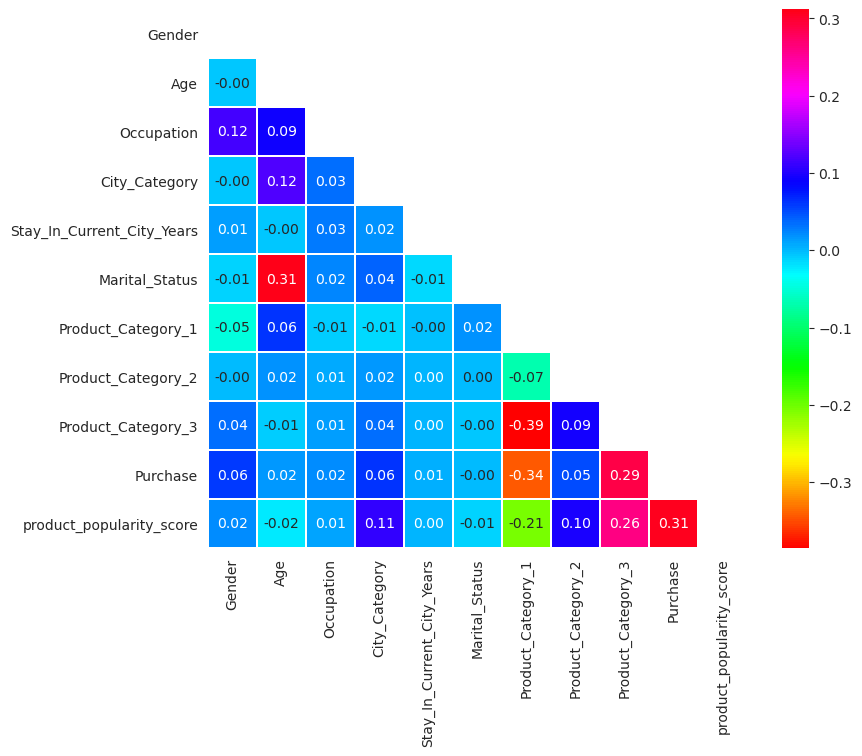

In [122]:
correlation=df.corr()
mask = np.zeros_like(correlation)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(9, 7))
    ax = sns.heatmap(correlation,mask=mask,square=True,annot=True,fmt='0.2f',linewidths=.8,cmap="hsv")



## modelling 

In [78]:
X=df.drop(columns=["Purchase"])
y=df["Purchase"]

In [79]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2,random_state=89)

## Decision tree

In [80]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor
dtr = DecisionTreeRegressor(max_depth=20,
                            min_samples_split=10,
                           max_leaf_nodes=10,
                            min_samples_leaf=2,
                            random_state=150)
dtr.fit(X_train, y_train)
print("Train accuracy:", dtr.score(X_train, y_train))
print("Test accuracy:", dtr.score(X_test, y_test))


Train accuracy: 0.6296593271304626
Test accuracy: 0.6299010914112204


In [81]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor
dtr = DecisionTreeRegressor(max_depth=12,
                            min_samples_split=300,
                            min_samples_leaf=10,
                            random_state=150)
dtr.fit(X_train, y_train)
print("Train accuracy:", dtr.score(X_train, y_train))

print("Test accuracy:", dtr.score(X_test, y_test))

Train accuracy: 0.7054199118801225
Test accuracy: 0.7005448813828294


In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = { 
              'min_samples_split':[10,50,100,150,200,250,300], 
              'max_depth':[4,6,8,9,10,11,12],
              "min_samples_leaf":[2,5,10,15,20,30,50]
     
             }

dtr = DecisionTreeRegressor(random_state=89)

gsearch = GridSearchCV(dtr, param_grid=parameters, cv=10, verbose=1, n_jobs=-1)

gsearch.fit(X_train, y_train)

Fitting 10 folds for each of 343 candidates, totalling 3430 fits


In [ ]:
gsearch.best_params_

In [ ]:
gsearch.best_score_

In [82]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor
dtr = DecisionTreeRegressor(max_depth=30,
                            min_samples_split=450,
                            min_samples_leaf=10,
                            random_state=89)
dtr.fit(X_train, y_train)
print("Train accuracy:", dtr.score(X_train, y_train))

print("Test accuracy:", dtr.score(X_test, y_test))

Train accuracy: 0.7152816965234976
Test accuracy: 0.7085016131509781


In [83]:
dtr.feature_importances_

array([9.97946654e-04, 2.92128666e-03, 1.72505256e-03, 1.76080952e-03,
       3.85792812e-04, 6.11183999e-05, 8.83358573e-01, 1.12211778e-02,
       9.46550015e-03, 8.81027424e-02])

In [84]:
impt=pd.DataFrame({"variables":X_train.columns, "imp":dtr.feature_importances_}).sort_values(by="imp", ascending=False)

In [85]:
impt

,variables,imp
6,Product_Category_1,0.883359
9,product_popularity_score,0.088103
7,Product_Category_2,0.011221
8,Product_Category_3,0.009466
1,Age,0.002921
3,City_Category,0.001761
2,Occupation,0.001725
0,Gender,0.000998
4,Stay_In_Current_City_Years,0.000386
5,Marital_Status,0.000061


In [86]:
selected_var=["Product_Category_1","Product_Category_2","Product_Category_3","product_popularity_score"]

In [87]:
X_train1=X_train[selected_var]
X_test1=X_test[selected_var]

In [88]:
dtr = DecisionTreeRegressor(max_depth=30,
                            min_samples_split=450,
                            min_samples_leaf=10,
                            random_state=89)
dtr.fit(X_train1, y_train)
print("Train accuracy:", dtr.score(X_train1, y_train))

print("Test accuracy:", dtr.score(X_test1, y_test))

Train accuracy: 0.714640043695898
Test accuracy: 0.7129630818745173


## random forest 

In [89]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=0)

In [90]:
from sklearn.ensemble import RandomForestRegressor

In [91]:
rf1=RandomForestRegressor()

In [92]:
rf1.fit(X_train, y_train)
print("Train Accuracy :", rf1.score(X_train,y_train))
print("Test Accuracy :", rf1.score(X_test,y_test))

Train Accuracy : 0.93064788657541
Test Accuracy : 0.6766498532714869


In [94]:
rf2 = RandomForestRegressor(max_depth=90,
    min_samples_split=650,
    min_samples_leaf=12,
    random_state=89)
rf2.fit(X_train, y_train)
print("Train accuracy:", rf2.score(X_train, y_train))

print("Test accuracy:", rf2.score(X_test, y_test))


Train accuracy: 0.7117624762007035
Test accuracy: 0.7118720166019274


## xgboost

In [104]:
from xgboost import XGBRegressor
xgb = XGBRegressor(random_state = 89)


In [108]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2, random_state=89)

In [109]:
xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=89,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [110]:
print("Train Accuracy :", xgb.score(X_train,y_train))
print("Test Accuracy :", xgb.score(X_test,y_test))

Train Accuracy : 0.7274428991170768
Test Accuracy : 0.7198941781528722


## predictions 

In [111]:
X_train.columns

Index(['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'product_popularity_score'],
      dtype='object')

In [112]:
X_test1=X_test.copy()

In [113]:
X_test1["Predicted_Purchase"]=xgb.predict(X_test1)

In [114]:
X_test1

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,product_popularity_score,Predicted_Purchase
406268,1,2,11,1,1,0,1,2.0,8.0,0.857371,17480.490234
112701,1,1,0,3,1,0,1,2.0,0.0,0.135178,13028.150391
110177,1,4,0,3,2,0,15,0.0,0.0,0.023949,14813.249023
511109,1,7,15,1,4,1,1,8.0,17.0,0.238957,12645.113281
447522,1,4,12,2,1,1,5,11.0,12.0,0.271953,5803.774414
...,...,...,...,...,...,...,...,...,...,...,...
269626,1,1,10,2,2,0,8,17.0,0.0,0.100053,5984.529785
378362,1,3,7,1,2,0,5,9.0,0.0,0.444385,6138.239258
282234,1,2,4,1,1,1,8,0.0,0.0,0.005854,5877.528320
528019,1,4,7,2,4,0,8,0.0,0.0,0.075572,7448.556152


In [116]:
X_test1.to_csv("purchase_prediction.csv")